## Créer un grand fichier all2.txt

In [137]:
!cat ../tp4/camille_Titanic/*.txt > ../tp4/all2.txt

## Explorer le corpus par mois, décennie et année

In [138]:
# Imports
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

In [139]:
# Accès au fichier
path = "../tp4/camille_Titanic/"
files = sorted(os.listdir(path))

In [140]:
# Instanciation des variables
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
count_year = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
        count_year[year] += 1
    else:
        print(f"Anomalous file: {f}")

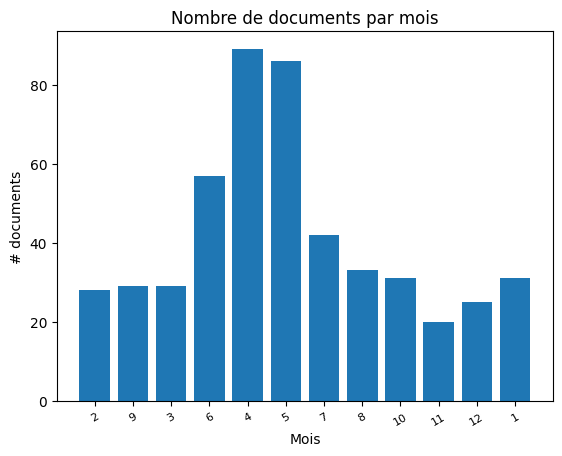

In [141]:
# Génération du plot par mois
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

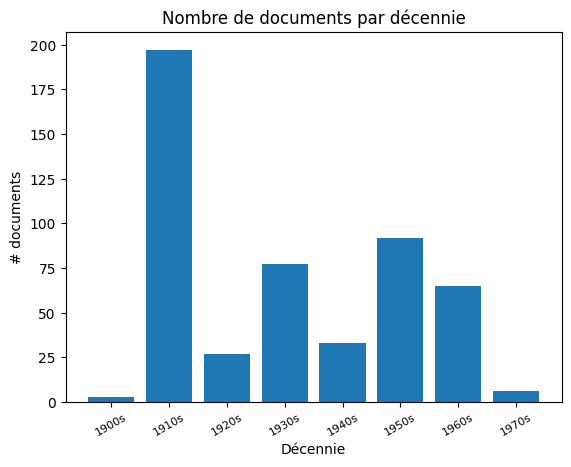

In [142]:
# Génération du plot par décennie
index = np.arange(len(count_decade))
plt.bar(index, count_decade.values())
plt.xlabel('Décennie')
plt.ylabel('# documents')
plt.xticks(index, count_decade.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par décennie')
plt.show()

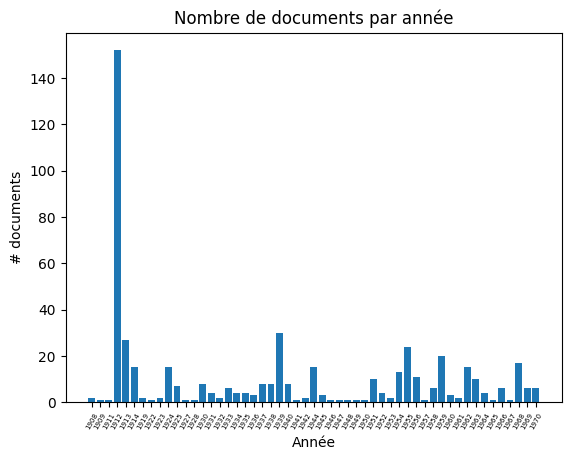

In [143]:
# Génération du plot par année
index = np.arange(len(count_year))
plt.bar(index, count_year.values())
plt.xlabel('Année')
plt.ylabel('# documents')
plt.xticks(index, count_year.keys(), fontsize=5, rotation=60)
plt.title('Nombre de documents par année')
plt.show()

## Créer un nuage de mots pour l'année 1912

**Imports et stopwords**

In [144]:
# Imports
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anoukchapuis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [145]:
# Stopwords
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "bruxelles", "peu", "toujours", "heure",
       "midi", "mois", "quelques", "quelque", "fit", "brux", "ceux", "plusieurs", "rossel",
       "agence", "devant", "avant", "leurs", "dès", "alors", "enfin", "voir", "rien", "jamais",
       "puis", "elles", "celui", "aucun", "car", "vers", "tant", "jours", "ans", "an",
       "année", "années", "dernier", "dernière", "maison", "prix", "rue", "hier", "soir",
       "dés", "fois", "quand", "près", "chaque", "assez", "très", "saint", "heures", "francs",
       "toute", "jour", "laquelle", "dem", "prendre", "personne", "personnes", "gens", "temps",
       "chez", "ici", "seulement", "vient", "trop", "suite", "avenue", "etc", "façon", "seul",
       "cependant", "cas", "mis", "mme", "louer", "vendre", "hui", "parmi", "effet", "bon", 
       "bons", "bonne", "bonnes", "grand", "grands", "grande", "grandes", "petit", "petits",
       "petite", "petites", "nouveau", "nouveaux", "neuve", "nouvelles", "nouvelle", "voici",
       "partie", "part", "mètres", "mètre", "un", "deux", "trois", "quatre", "cinq", "cas", "parce",
       "déjà", "reste", "donner", "nombre", "mal", "jeune", "comme", "vend", "new", "dix", "pris",
       "vente", "aucune", "nombreux", "oui", "lorsque", "long", "également", "egalement", "première",
       "premiere", "gros", "général", "générale", "aujourd", "ensuite", "demi", "bas", "ecr",
       "partir", "premier", "font", "presque", "reçu", "dix", "parti", "seule", "avril", "mai",
       "mieux", "divers", "homme", "femme"]
sw = set(sw)

**Création d'un fichier pour l'année 1912**

In [146]:
# Choix d'une année
year = 1912

In [147]:
# Liste des fichiers de cette année
data_path = '../tp4'
txt_path = '../tp4/camille_Titanic'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
#txts

In [148]:
# Stockage du contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [149]:
# Comptage du nombre d'éléments (=fichiers) dans la liste
len(content_list)

152

In [150]:
# Ecriture de tout le contenu dans un fichier temporaire
temp_path = '../tp4/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

**Nettoyage du fichier 1912.txt**

In [151]:
# Création de la fonction de nettoyage
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [152]:
# Application de la fonction au fichier
clean_text(year, folder=temp_path)

'Output has been written in ../tp4/tmp/1912_clean.txt!'

In [153]:
# Vérification du résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'eoiiüjrfttulaîent dame remettait nue ojçrbe tteture fiéeee paris madrid arriva vpemtâr dau efiiquièiue éiape bruxeales roubîdx kxfceûni concurrents loin derrière lut bravant teiikpôte massait orneore étape vante roubaix ratiais eptito étape atots domvreâ dauvras tondres ituluènro loaeteee brisfifim dou rres neuvième meovres calaùs fusant lore uiotetees jmar aloj èspâvall pesitror triomphateur paris paoao moteur retardait froyères classa oaeecmeat générai aooompîl traie oeuaptet beaumont garrec t'

**Création d'un nuage de mots pour le fichier 1912_clean.txt**

In [154]:
# Affichage des termes les plus fréquents
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('dos', 802), ('paris', 598), ('matin', 537), ('ministre', 532), ('nord', 516), ('place', 512), ('lieu', 509), ('titanic', 505), ('chambre', 484), ('gouvernement', 483)]


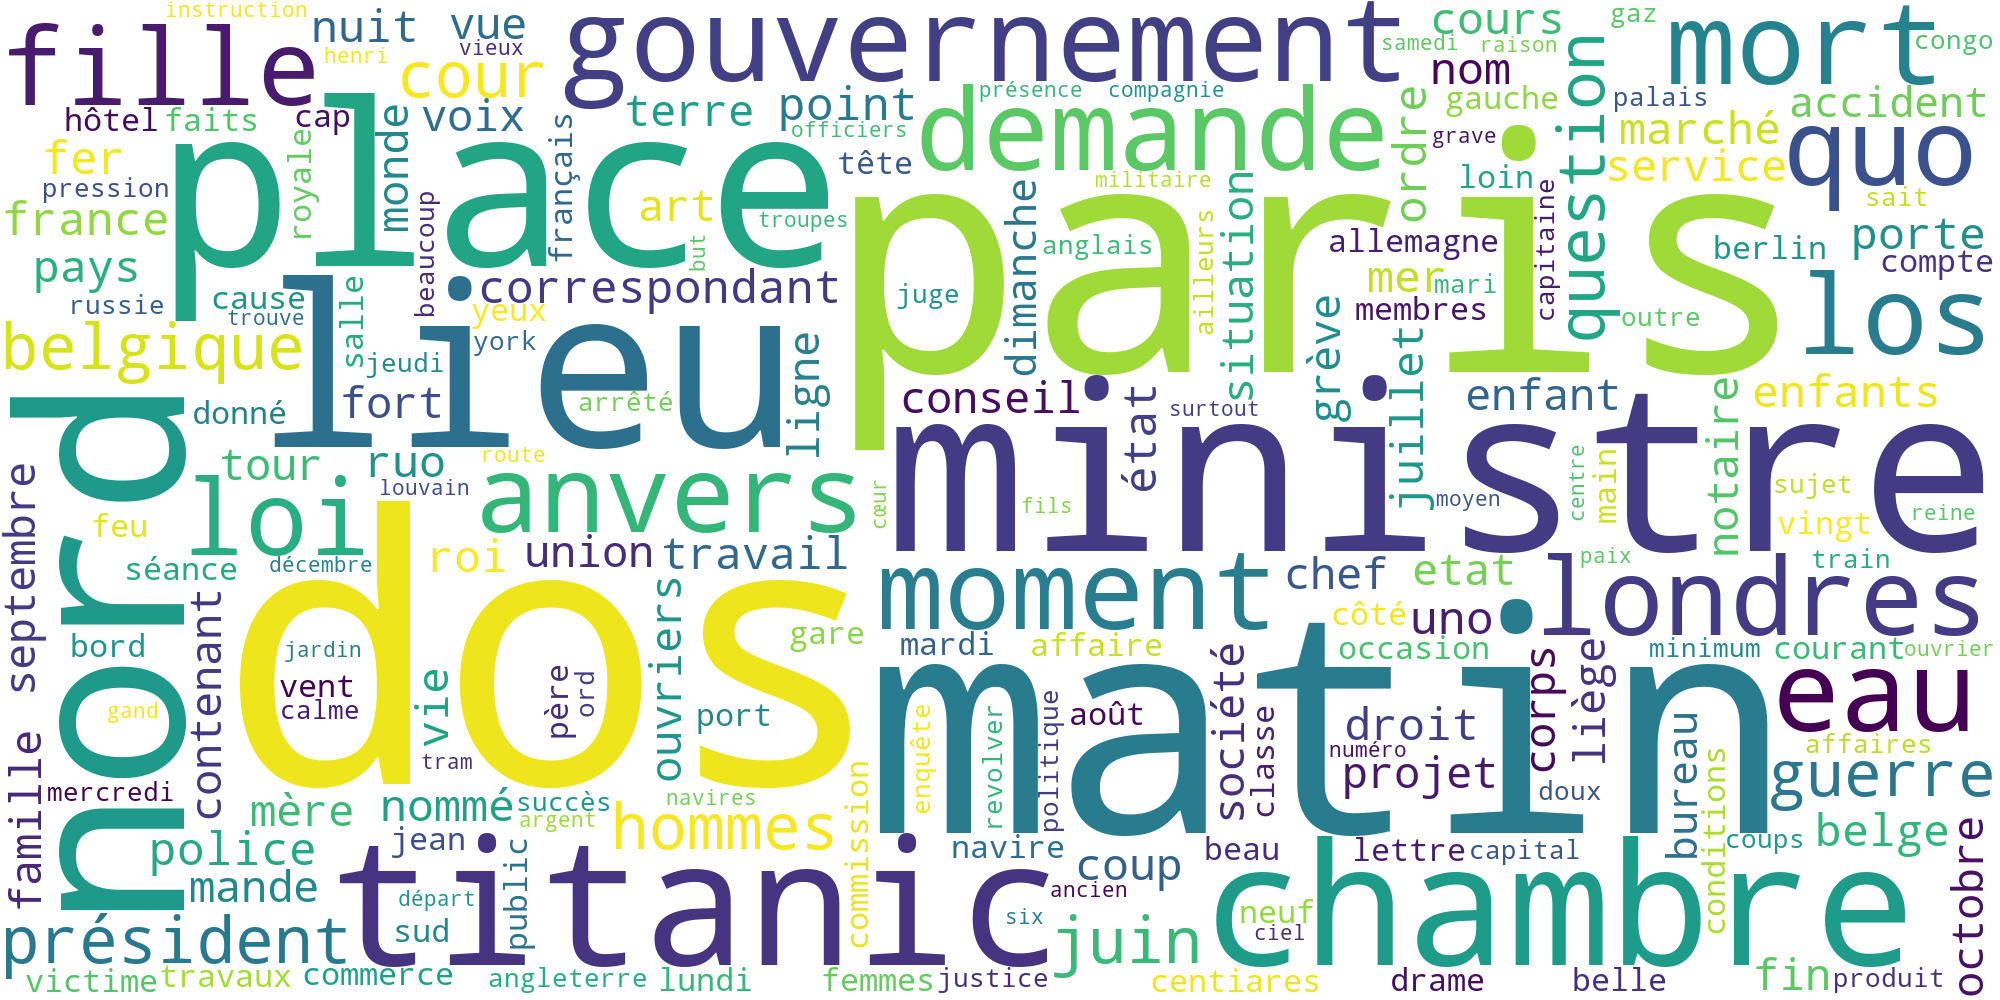

In [155]:
# Création, stockage et affichage du nuage de mots
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

## Analyser les sentiments sur des phrases sélectionnées au sein du corpus

**Imports et fonction**

In [156]:
# Imports
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [157]:
# Fonction
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

**Analyse de sentiment de 10 phrases**

In [158]:
get_sentiment("Le Titanic possède un tonnage de 46,000 tonnes, soit 12.000 de plus que le Mauretania qui, jusqu'à présent, était le plus grand navire du monde.")

This text is 22% positive and 0.17% subjective.


In [159]:
get_sentiment("Alors, je l’avoue, je fis intérieurement le vœu que quelqu'un à bord du radeau mourût pour que je pusse occuper sa place.")

This text is neutral and perfectly objective.


In [160]:
get_sentiment("L’accident était inévitable.")

This text is 20% negative and 0.4% subjective.


In [161]:
get_sentiment("Il était muni des plus récentes inventions scientifiques et sa décoration avait disposé des ressources immenses qu’offrait le luxe allié à l’art.")

This text is 29% positive and 0.35% subjective.


In [162]:
get_sentiment("La construction des transatlantiques géants qui déplaceront 8,000 tonnes de plus que le Lusitania et le Mauritania de la ligne Cunard a commencé et durera 3 ans.")

This text is 18% positive and 0.3% subjective.


In [163]:
get_sentiment("Ces deux Léviathans de la mer ne seront pas appelés, d’après les intentions de leurs propriétaires, à battre le record de la vitesse.")

This text is neutral and perfectly objective.


In [164]:
get_sentiment("La Milite Star Company vient de lancer à Belfast son nouveau transatlantique Titanic.")

This text is 34% positive and 0.25% subjective.


In [165]:
get_sentiment("Cette ville flottante est peut-être plus extraordinaire encore comme entreprise financière que mécanique.")

This text is 4% positive and 0.3333333333333333% subjective.


In [166]:
get_sentiment("Malgré la distance, la foule massée sur les quais distinguait les formes du splendide navire dont les contours étaient dessinés par des cordons de lumière électrique, marquant les hublots et les superstructures.")

This text is 28% positive and 0.43333333333333335% subjective.


In [167]:
get_sentiment("Si les dernières nouvelles se confirment, la perte du Titanic sera la plus terrible catastrophe maritime qu’on ait jamais enregistrée.")

This text is 25% negative and 0.3216666666666667% subjective.
